pip install pandas numpy seaborn matplotlib scikit-learn graphviz xgboost

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import xgboost
# 3800+3800

In [23]:
churn = pd.read_csv('telecom_churn_clean.csv')

In [24]:
from sklearn.model_selection import train_test_split
X = churn.drop('churn', axis=1)
y = churn['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lasso =Lasso()
lasso.fit(X_train_scaled, y_train)
r = RandomForestClassifier()
r.fit(X_train_scaled, y_train)
r.score(X_train_scaled, y_train)
y_preds = r.predict(X_test_scaled)
accuracy_score(y_test, y_preds)

0.955

In [26]:
import xgboost
xgb = xgboost.XGBClassifier(objective='binary:logistic', n_estimators=100)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)
accuracy_score(y_test, y_preds)

0.953

In [27]:
sum(y_preds==y_test)/y_test.shape[0]


0.953

In [31]:
heart = pd.read_csv('heart-disease.csv')
X = heart.drop('target', axis=1)
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(max_depth=3)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
dt_clf.fit(X_train, y_train)
dt_clf.fit(X_train_scaled, y_train)
y_scaled_preds = dt_clf.predict(X_test_scaled)
y_preds = dt_clf.predict(X_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [32]:
print(accuracy_score(y_test, y_scaled_preds))
print(accuracy_score(y_test, y_preds))

0.7802197802197802
0.7032967032967034


In [33]:
xg =xgboost.XGBClassifier(objective='binary:logistic')
xg.fit(X_train, y_train)
y_preds = xg.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.7692307692307693


In [34]:
xg =xgboost.XGBClassifier(objective='binary:logistic')
xg.fit(X_train_scaled, y_train)
y_preds = xg.predict(X_test_scaled)
print(accuracy_score(y_test, y_preds))

0.8021978021978022


In [35]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier(max_depth=3)
# params = {'max_depth': [1,2,4,6], 'max_leaf_node,}
cv = cross_val_score(dt_clf, X_train, y_train, cv=10)
np.mean(cv)

0.8073593073593074

In [36]:
np.mean(X_train_scaled[2])

0.16669874196336137

In [37]:
X = churn.drop('churn', axis=1)
y = churn['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xg_clf = xgboost.XGBClassifier(objective='binary:logistic')
xg_clf.fit(X_train, y_train)
y_preds=xg_clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.946

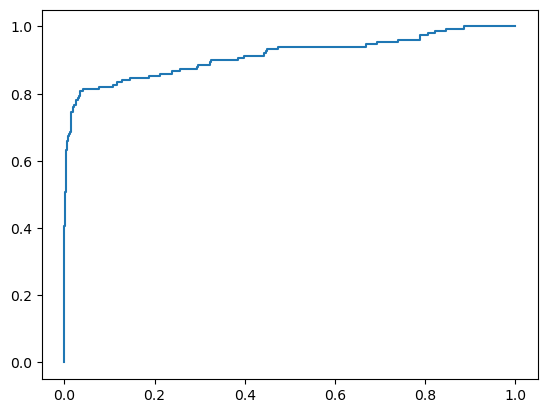

In [38]:
from sklearn.metrics import roc_curve
y_preds_probs =  xg_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_preds_probs[:,1])
plt.plot(fpr, tpr)

In [39]:
import xgboost as xgb
X = churn.drop('churn', axis=1)
y = churn['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
churn_dmatrix = xgb.DMatrix(data=X, label=y) 
params = {'objective':'reg:logistic', 'max_depth':3}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics='error', as_pandas=True)
cv_results
# xg_clf.fit(X_train, y_train)
# y_preds=xg_clf.predict(X_test)
# accuracy_score(y_test, y_preds)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.144914,0.002295,0.144914,0.004590
1,0.093009,0.002215,0.100810,0.007087
2,0.087759,0.002235,0.095410,0.001273
3,0.080708,0.002658,0.090909,0.004590
4,0.070807,0.009063,0.082208,0.008454


In [40]:
(1-cv_results['test-error-mean'].iloc[-1])*100

91.77917791779177

In [41]:
cv_results = xgb.cv(dtrain=churn_dmatrix, nfold=4, params=params, num_boost_round=7, metrics='auc')
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.832929,0.005522,0.822821,0.023383
1,0.878056,0.017028,0.865000,0.012354
2,0.896113,0.004610,0.885833,0.013643
3,0.898959,0.003620,0.887329,0.014435
4,0.907983,0.006512,0.893266,0.015876
5,0.914528,0.006632,0.903182,0.016961
6,0.916711,0.006987,0.905579,0.016529


In [42]:
cv_results.describe()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
count,7.000000,7.000000,7.000000,7.000000
mean,0.892183,0.007273,0.880430,0.016169
std,0.029219,0.004467,0.028719,0.003578
min,0.832929,0.003620,0.822821,0.012354
25%,0.887084,0.005066,0.875417,0.014039
50%,0.898959,0.006512,0.887329,0.015876
75%,0.911255,0.006810,0.898224,0.016745
max,0.916711,0.017028,0.905579,0.023383


In [43]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6417-5FB0

 Directory of C:\Users\hp\Desktop\Python\ML\DATACAMP\Aa ML scientist\extreme boosting with xgboost

12/24/2024  03:16 PM    <DIR>          .
12/24/2024  03:16 PM    <DIR>          ..
12/22/2024  03:27 PM    <DIR>          .ipynb_checkpoints
12/22/2024  03:21 PM            65,536 ames housing clean.csv
12/22/2024  03:18 PM           196,754 ames housing dirty.csv
12/22/2024  03:16 PM           196,754 ames housing.csv
12/22/2024  01:24 PM         7,852,279 chapter1 (11).pdf
12/22/2024  01:23 PM         1,107,098 chapter2 (8).pdf
12/22/2024  01:23 PM           276,862 chapter3 (8).pdf
12/22/2024  01:22 PM           318,664 chapter4 (8).pdf
12/24/2024  03:14 PM           110,427 extreme boost.ipynb
01/16/2020  06:02 PM            11,328 heart-disease.csv
12/22/2024  03:22 PM            43,450 kidney.csv
12/24/2024  03:16 PM                92 output
12/24/2024  03:16 PM            16,520 output.pdf
12/24/2024  03:16 PM   

In [44]:
housing = pd.read_csv('ames housing clean.csv')
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'Remodeled', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'PavedDrive',
       'SalePrice'],
      dtype='object')

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier()
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1).dropna()
y = housing['SalePrice'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
sns.barplot(y=X.columns, x=rf.feature_importances_, order=X.columns.)
plt.xticks(rotation=90);

SyntaxError: invalid syntax (526089120.py, line 1)

In [49]:
feature_df = pd.DataFrame(index=rf.feature_importances_, columns=X.columns)

In [144]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
housing = housing.dropna()
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
housing['Neighborhood_label']= label.fit_transform(housing['Neighborhood'])
housing['MSZoning_label']= label.fit_transform(housing['MSZoning'])
housing['BldgType_label']= label.fit_transform(housing['BldgType'])
housing['HouseStyle_label']= label.fit_transform(housing['HouseStyle'])
housing['PavedDrive_label']= label.fit_transform(housing['PavedDrive'])
housing['LotFrontage_label']= label.fit_transform(housing['LotFrontage'])
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xg_reg = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror', n_estimators=300)
xg_reg.fit(X_train, y_train)
y_preds  =xg_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

31492.86579513399

In [145]:
dm_train =xgb.DMatrix(data=X_train, label=y_train)
dm_test =xgb.DMatrix(data=X_test, label=y_test)
params = {'booster':'gblinear', 'objective':'reg:squarederror'}
xg_reg = xgb.train(params=params, dtrain=dm_train, num_boost_round=5)
y_preds =xg_reg.predict(dm_test)
np.sqrt(mean_squared_error(y_test, y_preds))

60029.49491216381

In [146]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
params = {'objective':'reg:squarederror', 'max_depth':4}
dmatrix = xgb.DMatrix(data=X, label=y)
xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=6, metrics='rmse')

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,66235.890744,2115.496864,67272.889092,9620.253963
1,52616.705836,1701.422659,56099.662658,9268.747994
2,42646.135472,1362.292488,48754.205311,7972.428290
3,35819.625889,1127.706473,44451.343724,6079.635683
4,30713.660668,1106.721879,41785.676891,4072.556165
5,26840.776385,1040.275612,40467.523535,2722.301799


In [147]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
params = {'objective':'reg:squarederror', 'max_depth':4}
dmatrix = xgb.DMatrix(data=X, label=y)
xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=6, metrics='mae')

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,47948.470242,1621.054321,48757.038386,5463.078681
1,37144.806241,1355.234583,39225.694947,5203.532387
2,29641.643977,1087.741611,33031.779996,4819.402661
3,24638.517157,995.187476,29183.674050,3823.067816
4,21156.030513,970.735816,26611.377725,3121.936549
5,18641.731886,909.769012,25080.272018,2489.099416


In [148]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
params = {'objective':'reg:squarederror', 'max_depth':3}
dmatrix = xgb.DMatrix(data=X, label=y)
rmse_l2 = {}
reg_params = [1, 9,10,20, 30, 50, 100, 200]
for reg in reg_params:
    params['lambda']= reg
    cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=6, metrics='rmse')
    rmse_l2[reg] =(cv_results['test-rmse-mean'].tail(1).values[0])
rmse_l2 = pd.DataFrame(list(zip(reg_params, rmse_l2)), columns=['l2', 'rmse'])

In [149]:
# rmse_l2.keys(), rmse_l2.values())

In [150]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
params = {'objective': 'reg:squarederror', 'max_depth':2}
dmatrix = xgb.DMatrix(data =X_train, label=y_train)
xgb_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=20)

<Axes: >

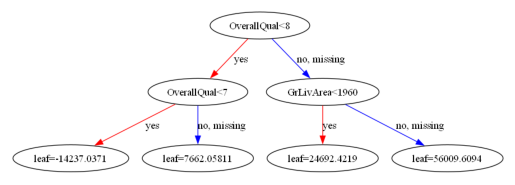

In [151]:
xgb.plot_tree(xgb_reg, num_treee=13) 

<Axes: >

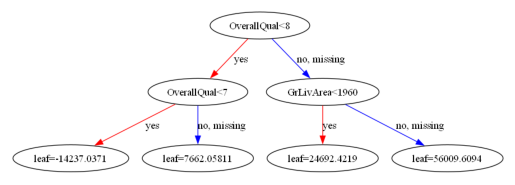

In [152]:
xgb.plot_tree(xgb_reg, num_tree=9)

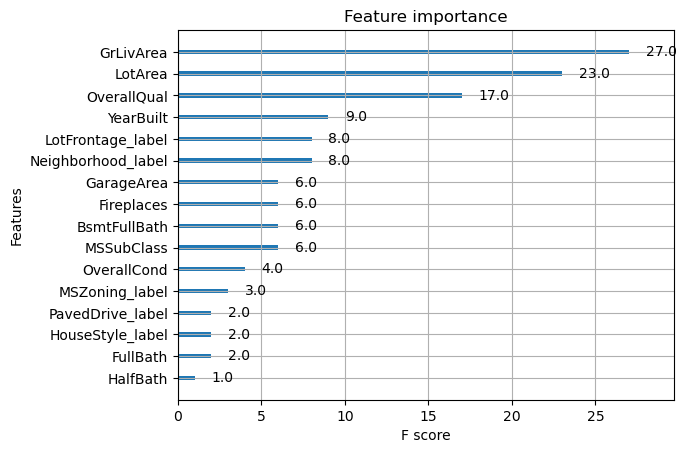

In [153]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dmatrix_train = xgb.DMatrix(X_train, y_train)
dmatrix_test = xgb.DMatrix(X_test, y_test)
params = {'objective':'reg:squarederror', 'max_depth':5}
xg_reg =xgb.train(dtrain=dmatrix_train, num_boost_round=5, params=params)
y_preds  =xg_reg.predict(dmatrix_test)
np.sqrt(mean_squared_error(y_test, y_preds))
xgb.plot_importance(xg_reg);

In [161]:
X = housing.drop(['MSZoning', 'BldgType', 'Neighborhood', 'HouseStyle', 'PavedDrive', 'LotFrontage', 'SalePrice'], axis=1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dmatrix_train = xgb.DMatrix(X, y)
# dmatrix_test = xgb.DMatrix(X_test, y_test)
params = {'objective':'reg:squarederror', 'max_depth':5}
cv_results =xgb.cv(dtrain=dmatrix_train, num_boost_round=5, params=params, metrics='rmse')
cv_results['test-rmse-mean'].tail(1)
# y_preds  =xg_reg.predict(dmatrix_test)
# np.sqrt(mean_squared_error(y_test, y_preds))
# xgb.plot_importance(xg_reg);

4    44921.474339
Name: test-rmse-mean, dtype: float64